In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris=sns.load_dataset("iris")

In [3]:
iris.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [4]:
y=iris['species'].values
X=iris[['sepal_length','sepal_width','petal_length','petal_width']]

In [5]:
from sklearn.model_selection import train_test_split
X_trainval,X_test,y_trainval,y_test=train_test_split(X,y,test_size=0.20)

In [6]:
df_ytrain=pd.DataFrame(y_trainval)
df_ytest=pd.DataFrame(y_test)

In [7]:
print("In training Split:")
print(df_ytrain[0].value_counts())

In training Split:
versicolor    40
setosa        40
virginica     40
Name: 0, dtype: int64


In [8]:
print("In testing Split:")
print(df_ytest[0].value_counts())

In testing Split:
setosa        10
virginica     10
versicolor    10
Name: 0, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler().fit(X_trainval)
X_trainval_scaled=scaler.transform(X_trainval)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.svm import SVC
model=SVC()

In [11]:
model.fit(X_trainval_scaled,y_trainval)

SVC()

In [12]:
train_score=model.score(X_trainval,y_trainval)
test_score=model.score(X_test_scaled,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [13]:
print("Training Accuracy:", train_score)
print("Test Accuracy:",test_score)

Training Accuracy: 0.2916666666666667
Test Accuracy: 0.9666666666666667


In [14]:
y_predicted=model.predict(X_test_scaled)

In [15]:
print(y_test)

['setosa' 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica']


In [16]:
print(y_predicted)

['setosa' 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica']


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted,digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        10
  versicolor      0.909     1.000     0.952        10
   virginica      1.000     0.900     0.947        10

    accuracy                          0.967        30
   macro avg      0.970     0.967     0.967        30
weighted avg      0.970     0.967     0.967        30



In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


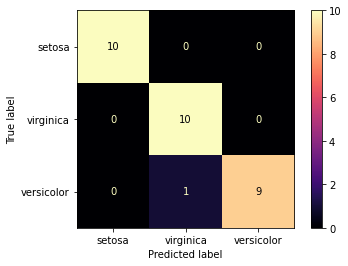

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,
                      X_test_scaled,
                      y_test,
                      display_labels=['setosa','virginica','versicolor'],cmap=plt.cm.magma
)